In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
market = pd.read_csv('prices_round_2_day_-1.csv')
for column_headers in market.columns: 
    market_columns = column_headers.split(';')
market['market_info'] = market.iloc[:,0].str.split(';')
df = pd.DataFrame(market['market_info'].tolist(), columns=market_columns).fillna(0)


In [37]:
print(df)

      day timestamp       product bid_price_1 bid_volume_1 bid_price_2  \
0      -1         0        PEARLS       10002            1        9996   
1      -1         0  PINA_COLADAS       14999           38       14998   
2      -1         0      COCONUTS        7999          162               
3      -1         0       BANANAS        4951            1        4946   
4      -1       100        PEARLS        9996            2        9995   
...    ..       ...           ...         ...          ...         ...   
39995  -1    999800        PEARLS        9995           20               
39996  -1    999900  PINA_COLADAS       15228          102               
39997  -1    999900      COCONUTS        8113          178               
39998  -1    999900       BANANAS        4892           31               
39999  -1    999900        PEARLS        9996            2        9995   

      bid_volume_2 bid_price_3 bid_volume_3 ask_price_1 ask_volume_1  \
0                2        9995         

In [39]:
pina_colada = df.groupby('product').get_group('PINA_COLADAS')
coconuts = df.groupby('product').get_group('COCONUTS')
pina_colada = pina_colada.reset_index()
coconuts = coconuts.reset_index()

Average Price
being the midprice between `Buy` and `Sell`


In [ ]:
#coconut = 8000
#pina colados = 15000

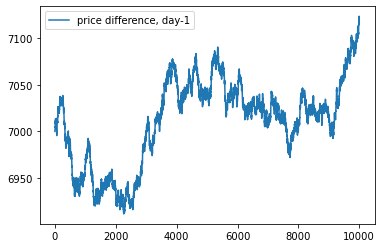

In [40]:
def getMidPrices(df, prodcut_name):
    buy_prices = df['bid_price_1']
    sell_prices = df['ask_price_1']
    mid_prices = []
    for i in range(0,len(df)):
        mid_prices.append((int(buy_prices[i]) + int(sell_prices[i]))/2)
    return mid_prices

pc_midprices = getMidPrices(pina_colada, 'PINA COLADAS') # should be midpricesETF
c_midprices = getMidPrices(coconuts, 'COCONUTS')

plt.plot(np.array(pc_midprices) - np.array(c_midprices),label= 'price difference, day-1')
#plt.plot(c_midprices,label= 'COCONUTS')
plt.legend()
plt.show()

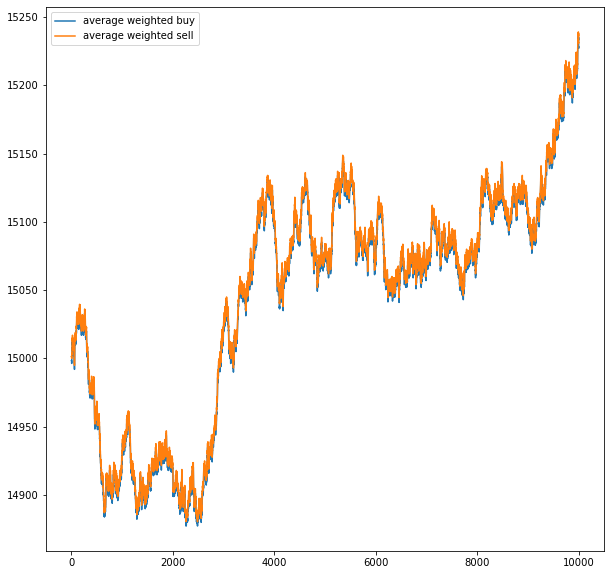

In [41]:
def getWAMidPrices(df, product_name):
    def simpleWA_buy(group):
        price1, price2, price3 = float(group['bid_price_1']) if group['bid_price_1'] else 0 , float(group['bid_price_2']) if group['bid_price_2'] else 0, float(group['bid_price_3']) if group['bid_price_3'] else 0
        weight1, weight2, weight3 = float(group['bid_volume_1']) if group['bid_volume_1'] else 0, float(group['bid_volume_2']) if group['bid_volume_2'] else 0,float(group['bid_volume_3']) if group['bid_volume_3'] else 0
        return (price1*weight1 + price2*weight2 + price3*weight3)/(weight1 + weight2 + weight3)
    def simpleWA_sell(group):
        price1, price2, price3 = float(group['ask_price_1']) if group['ask_price_1'] else 0 , float(group['ask_price_2']) if group['ask_price_2'] else 0, float(group['ask_price_3']) if group['ask_price_3'] else 0
        weight1, weight2, weight3 = float(group['ask_volume_1']) if group['ask_volume_1'] else 0, float(group['ask_volume_2']) if group['ask_volume_2'] else 0,float(group['ask_volume_3']) if group['ask_volume_3'] else 0
        return (price1*weight1 + price2*weight2 + price3*weight3)/(weight1 + weight2 + weight3)
    buy_average = df.apply(simpleWA_buy, axis = 1)
    sell_average = df.apply(simpleWA_sell, axis = 1)
    #midprices = (buy_average + sell_average)/2 #this is the midprice of each 'day'
    # plot 
    #plt.plot(midprices,label='midprice'+inst)
    midprices = (buy_average + sell_average)/2
    spread = sell_average - buy_average
    plt.figure(figsize=(10,10))
    #plt.plot(spread,label='spread')
    plt.plot(buy_average,label='average weighted buy')
    plt.plot(sell_average,label='average weighted sell')
    plt.legend()

    return(midprices)
WAmidprices = getWAMidPrices(pina_colada, 'pina_colada') # should be midpricesETF